<div align="right"><b>Parin Kittipongdaja<br>
M.Sc. CSIS : Data Science <br>
Parin.kiti@gmail.com<br>
Second step qualification</b></div>

<center><font size="6" color='DarkBlue'><b><u>Supermarket Dataset</u></b><br><br>Presentation for Applying Data Scientist Position<br><br> @ Data Café Thailand</font></center>

# Second step qualification
<p style="text-indent: 2.5em;">
    For the Second step qualification, to help us understand you more, we would like to ask you to help demonstrate your abilities regarding the position we are looking for. There are three perspectives we would like to see; 1) business, 2) data, and 3) analytics.
    
### Based on the dataset given

1. What are interesting business questions? Why are the chosen questions important to be explored?
2. What analytics techniques, reports, or dashboards should be used to help solve the selected problems? Please walk us through the process in which you scrutinize the problem. Show us some results or insights.
3. How data are prepared or processed? Show us an interesting way to transform these data into insights.

# Introduction

<p style="text-indent: 2.5em;">
The supermarket dataset describes the spending, product, and shopping date of supermarket customer. The dataset also consists of sales of the supermarket which have recorded in 4 different branches for one year and six months of data. We can use this information to find the pattern of customer behavior and extract the insight that brings them into business action. 

## Column   Description
- SHOP_DATE : Date when shopping has been made. Date is specified in the yyyymmdd format
- SHOP_HOUR : Hour slot of the shopping 0=00:00 …23=23:00 -00:59, 1=01:00 -23:59 -01:59,
- BASKET_ID : Basket ID. All items in a basket share the same basket_id value.
- CUST_CODE : Customer Code 
- STORE_CODE : Store Code 
- PROD_CODE : Product Code 
- QUANTITY : Number of items of the same product bought in this basket
- SPEND : Spend associated to the items bought


# Business Questions

1. What is the sales amount of the supermarket in hourly time?	
    - to find which period of the day is a poor performance that we will set up a promotion for increasing sales.
2. Which product can generate the highest sales and number of the customer?	
    - To find a profile of the top sale product that can let the supermarket import a similar product to increase the sales.
3. What customer distribution look like?	
    -  To find which customer group profile spending the most.
4. Which store has the most top performance?	
    - To figure out whether location is affect the sales amount.

# Analytics Techniques
![](https://zdnet4.cbsistatic.com/hub/i/r/2017/10/12/e52016a8-e234-47d4-8095-d3054d4d50a2/resize/370xauto/556c162026e62a92994d3320770d524c/tableau-logo.png)
- We are using Tableau for analyzing which can get actionable insights fast and make awesome analyzing interactive visualization.
- For Clustering Analysis, we use K-means Algorithm in Tableau.

According to business questions, we will create four dashboards to answer four questions include
- ‘Sales profile’
- ‘Product Profile’
- ‘Customer Profile’
- ‘Store Profile’

<center><font size="4" color='blue'>========================================================================================================================</font></center>
<center><font size="4" color='red'><b>However, in this notebook, we would like to demonstrate how to analyze and visualize data by using Python Programing on Jupyter Notebook.</b></font></center>
<center><font size="4" color='blue'>========================================================================================================================</font></center>

<a id="ch0"></a>
# Table of Contents
1. [Chapter 1 - Install Neccessary Library](#ch1)
1. [Chapter 2 - Check Version of Library](#ch2)
1. [Chapter 3 - Importing Required Libraries](#ch3)
1. [Chapter 4 - Step 1: Importing Dataset](#ch4)
1. [Chapter 5 - Step 2: Data Exploration](#ch5)
1. [Chapter 6 - Step 3: Business Insight & Data Visualization](#ch6)
    >[Sales Profile](#ch7) [Product Profile](#ch8) [Customer Profile](#ch9) [Store Profile](#ch10)
1. [Chapter 7 - Other interesting insight](#ch11)
1. [Chapter 8 - Conclusion (Business in Action)](#ch12)

<a id="ch1"></a>
# Install Neccessary Library
[Top](#ch0)

<a id="ch2"></a>
# Check Version of Library
[Top](#ch0)

In [1]:
import sys
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
import pandas

print ( "Python", sys.version )
print ( "Numpy", np.__version__ )
print ( "Matplotlib", matplotlib.__version__ )
print ( "Seaborn", sns.__version__ )
print ( "scikit-learn", sklearn.__version__ )
print ( "pandas", pandas.__version__ )

Python 3.7.1 (default, Nov  6 2018, 18:45:35) 
[Clang 10.0.0 (clang-1000.11.45.5)]
Numpy 1.14.6
Matplotlib 3.0.3
Seaborn 0.9.0
scikit-learn 0.21.3
pandas 0.24.2


<a id="ch3"></a>
# Importing Required Libraries
[Top](#ch0)

In [2]:
# Basic library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from itertools import cycle

from sklearn.cluster import KMeans

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Input data files are available in the "./Data/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the ./Data directory
print(os.listdir('./Data'))

-------------------------
['supermarket_data.csv']


<a id="ch4"></a>
# 1. Importing Dataset
[Top](#ch0)
- Unsupervised learning datasets.
- File name is 
    - supermarket_data.csv

In [3]:
df = pd.read_csv("./Data/supermarket_data.csv",
                 dtype={'BASKET_ID':object}, 
                 parse_dates=["SHOP_DATE"])

<a id="ch5"></a>
# 2. Data Exploration
[Top](#ch0)

In [4]:
df.sample(10, random_state=7)

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND
123755,2007-02-18,14,994104500253904,CUST0000139111,STORE00004,PRD0901122,1,1.94
109698,2007-09-12,18,994107500206038,CUST0000052854,STORE00001,PRD0904797,1,2.06
191152,2007-02-27,14,994104700281439,CUST0000188698,STORE00002,PRD0903458,4,2.08
19110,2007-07-17,14,994106700289547,CUST0000176594,STORE00004,PRD0903147,1,1.95
51716,2008-01-12,12,994109200388790,CUST0000370270,STORE00002,PRD0903214,1,0.82
268059,2007-08-04,14,994106900399430,CUST0000339006,STORE00001,PRD0903746,1,4.59
428801,2007-02-02,12,994104300777601,CUST0000960906,STORE00003,PRD0904511,1,1.50
474857,2007-02-10,10,994104400466829,CUST0000478420,STORE00002,PRD0902079,1,3.54
244124,2008-03-14,13,994110100402680,CUST0000354313,STORE00003,PRD0904915,1,0.96
470450,2007-07-17,12,994106700657520,CUST0000740257,STORE00002,PRD0901327,1,0.81


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671914 entries, 0 to 671913
Data columns (total 8 columns):
SHOP_DATE     671914 non-null datetime64[ns]
SHOP_HOUR     671914 non-null int64
BASKET_ID     671914 non-null object
CUST_CODE     671914 non-null object
STORE_CODE    671914 non-null object
PROD_CODE     671914 non-null object
QUANTITY      671914 non-null int64
SPEND         671914 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 41.0+ MB


In [6]:
df.describe(include='all')

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND
count,671914,671914.000000,671914,671914,671914,671914,671914.000000,671914.000000
unique,553,NaN,96304,4891,4,4978,NaN,NaN
top,2007-12-20 00:00:00,NaN,994109700461692,CUST0000942162,STORE00003,PRD0903052,NaN,NaN
freq,2123,NaN,64,2874,224390,15587,NaN,NaN
first,2007-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2008-07-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.745869,NaN,NaN,NaN,NaN,1.514344,1.852796
std,NaN,3.551738,NaN,NaN,NaN,NaN,1.668037,2.589564
min,NaN,8.000000,NaN,NaN,NaN,NaN,1.000000,0.010000
25%,NaN,12.000000,NaN,NaN,NaN,NaN,1.000000,0.750000


<a id="ch6"></a>
# 3. Business Insight & Data Visualization
[Top](#ch0)


According to business questions, we will create four dashboards to answer four questions include 
- ‘sales profile’ 
- ‘Product Profile’
- ‘Customer Profile’ 
- ‘Store Profile’

<a id="ch7"></a>
## Sales Profile
[Top](#ch0)

,QUANTITY,SPEND
SHOP_HOUR,,
8,44698,49274.02
9,37501,42322.34
10,54561,62304.08
11,73256,84965.21
12,95190,111701.80
13,107333,129049.35
14,101337,126085.17
15,94754,118399.94
16,86590,109195.19


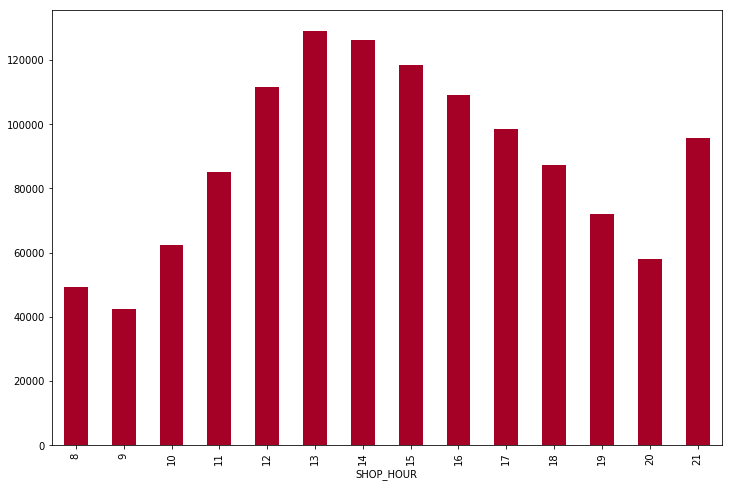

In [7]:
# Shop Hour Performance
df_shsum = df.groupby('SHOP_HOUR').sum()
display(df_shsum)
df_shsum['SPEND'].plot.bar(figsize=(12,8) ,cmap='RdYlGn')

### <font size="4" color='blue'><b>1. What is the sales amount of the supermarket in hourly time?</b></font>

<font size="4" color='blue'><b>- During 8-12 and 17-21 of shop hour has sales below average <br> - We should set up promotion on this period for increasing the sales</b></font>


<a id="ch8"></a>
## Product Profile
[Top](#ch0)

In [8]:
df_prod = df.groupby('PROD_CODE').agg({"SPEND": [sum], "BASKET_ID":['nunique'], "CUST_CODE":['nunique']})
df_prod.columns = ["_".join(x) for x in df_prod.columns.ravel()]
df_prod = df_prod.reset_index(drop=False)

In [9]:
principalDf = df_prod.drop(['PROD_CODE'], axis=1)
y = df_prod.loc[:,['PROD_CODE']].values

kmeans = KMeans(n_clusters=3)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

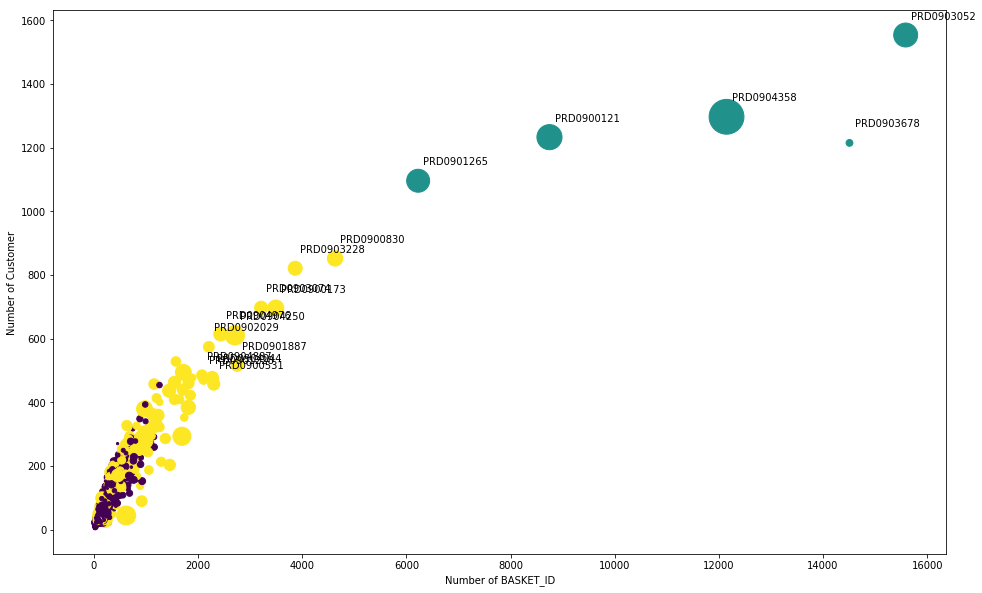

In [10]:
plt.figure(figsize=(16,10))
plt.scatter(principalDf.iloc[:, 1], principalDf.iloc[:, 2], s = principalDf.iloc[:, 0]/20,
            c=y_kmeans, cmap='viridis')
plt.xlabel('Number of BASKET_ID')
plt.ylabel('Number of Customer')
n = y
for i, txt in enumerate(n):
    if principalDf.iloc[:, 1][i] > 2000:
        plt.annotate(txt[0], (principalDf.iloc[:, 1][i]+100, principalDf.iloc[:, 2][i]+50))

### <font size="4" color='blue'><b>2. Which product can generate the highest sales and number of the customer?</b></font>

<font size="4" color='blue'><b>- Prd0904358 , Prd0903052, and Prd0900121 can generate good both sales and number of customer. <br> - We can use these product profile to import a similar product for increasing the sales.
</b></font>

<a id="ch9"></a>
## Customer Profile
[Top](#ch0)

In [11]:
df_grymCust = df.set_index('SHOP_DATE')
df_grymCust = df_grymCust.groupby([(df_grymCust.index.year),(df_grymCust.index.month),(df_grymCust.CUST_CODE)]).sum()
df_grymCust.index.names = ['SHOP_YEAR','SHOP_MONTH','CUST_CODE']

df_cust_sum = df_grymCust.groupby('CUST_CODE')[['SPEND']].sum().rename(columns={'SPEND': 'TOTAL_SPEND'})
df_cust_count = df_grymCust.groupby('CUST_CODE')[['SPEND']].count().rename(columns={'SPEND': '#_LTM'})

In [12]:
df_cust_date = df.groupby('CUST_CODE').agg({"SHOP_DATE": [min, max]}) 
df_cust_date.columns = ["_".join(x) for x in df_cust_date.columns.ravel()]


df_cust_date['TOTAL_LTM'] = (df_cust_date['SHOP_DATE_max'].apply(lambda x: x.year*12 + x.month) - 
                             df_cust_date['SHOP_DATE_min'].apply(lambda x: x.year*12 + x.month)) + 1

df_cust = df_cust_sum.join(df_cust_count)
df_cust['TOTAL_LTM'] = df_cust_date['TOTAL_LTM']
df_cust['%_ACTIVE_LTM'] = round(df_cust['#_LTM']*100/df_cust_date['TOTAL_LTM'],2)

In [13]:
principalDf = df_cust.loc[:,['TOTAL_SPEND']]
y = df_prod.loc[:,['PROD_CODE']].values

kmeans = KMeans(n_clusters=3)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

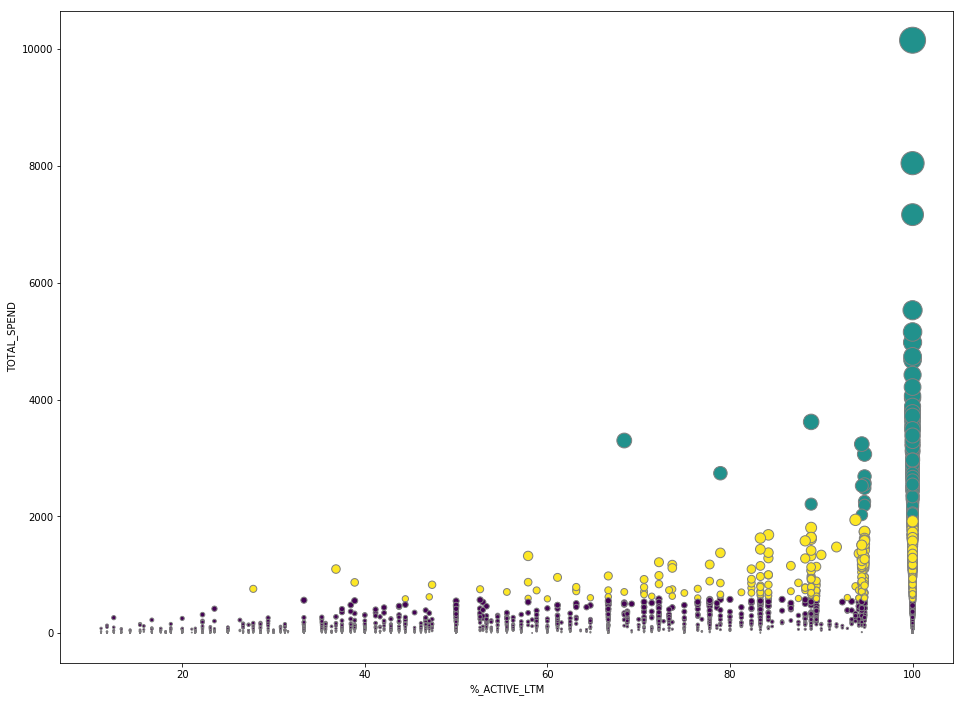

In [14]:
df_cust.plot(x='%_ACTIVE_LTM', y='TOTAL_SPEND', s = df_cust.loc[:,['TOTAL_SPEND']]/15,
             kind='scatter', edgecolors="grey", colorbar = False,
             c=y_kmeans, cmap='viridis', figsize=(16,12))

### <font size="4" color='blue'><b> 3. What customer distribution look like?</b></font>

<font size="4" color='blue'><b>- The more % active LTM, the more chance of customer spending is increased.<br> -
Customer cluster 3 is the cluster we should maintain their spending <br> -
Customer Cluster 2 is the cluster we should focus on to increase their spending <br> -
Customer Cluster 1 with high % active LTM we have plenty of room to improve the sales </b></font>

<a id="ch10"></a>
## Store Profile
[Top](#ch0)

In [15]:
df_store = df.set_index('SHOP_DATE')
df_store = df_store.groupby([(df_store.index.year),(df_store.index.quarter),(df_store.STORE_CODE)]).sum()
df_store.index.names = ['SHOP_YEAR','SHOP_QUARTER','STORE_CODE']

In [16]:
df_store_cust = df.set_index('SHOP_DATE')
df_store_cust = df_store_cust.groupby([(df_store_cust.index.year),(df_store_cust.index.quarter),(df_store_cust.STORE_CODE)]).count()
df_store_cust.index.names = ['SHOP_YEAR','SHOP_QUARTER','STORE_CODE']
df_store_cust = df_store_cust.iloc[:,[1]]
df_store_cust.columns = ['#_OF_CUST']

In [17]:
df_store_pro = df_store.join(df_store_cust).reset_index(level=['STORE_CODE'])
df_store_n = df_store_pro.copy()

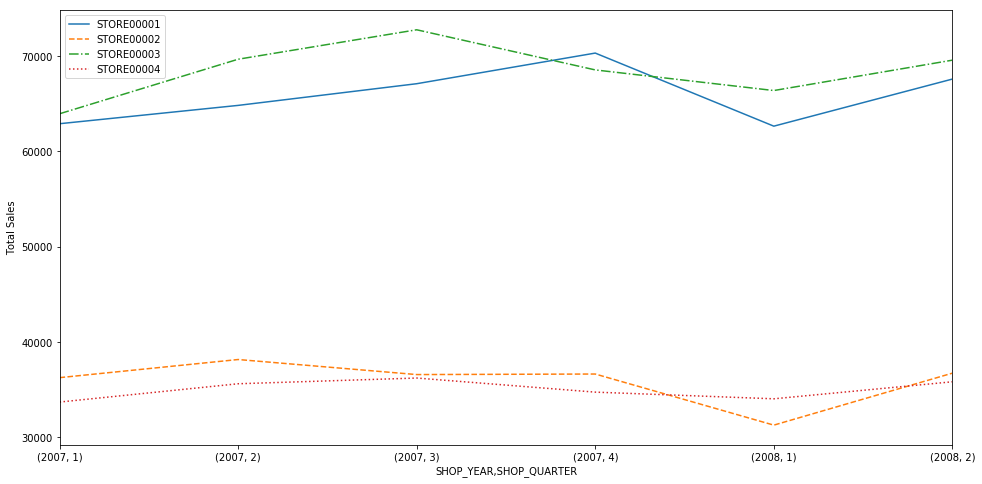

In [18]:
from itertools import cycle
linestyles = cycle(['-', '--', '-.', ':'])

ax_1 = df_store_n.loc[df_store_n['STORE_CODE']=='STORE00001'][['SPEND']][:-1].plot(y=['SPEND'], label=['STORE00001'], style = next(linestyles) )
ax_2 = df_store_n.loc[df_store_n['STORE_CODE']=='STORE00002'][['SPEND']][:-1].plot(y=['SPEND'], label=['STORE00002'], style = next(linestyles), ax=ax_1)
ax_3 = df_store_n.loc[df_store_n['STORE_CODE']=='STORE00003'][['SPEND']][:-1].plot(y=['SPEND'], label=['STORE00003'], style = next(linestyles), ax=ax_2)
ax_4 = df_store_n.loc[df_store_n['STORE_CODE']=='STORE00004'][['SPEND']][:-1].plot(y=['SPEND'], label=['STORE00004'], style = next(linestyles), ax=ax_3, figsize=(16,8))

ax_4.set_ylabel('Total Sales');

### <font size="4" color='blue'><b> 4. Which store has the most top performance?</b></font>

<font size="4" color='blue'><b>- Store00003 and Store 00001 are the top performance. <br> -
At 2008 Q1 the sales per month decrease every store; therefore, the cause of sales drop should not come from location.</b></font>

<a id="ch11"></a>
# Other interesting insight
[Top](#ch0)

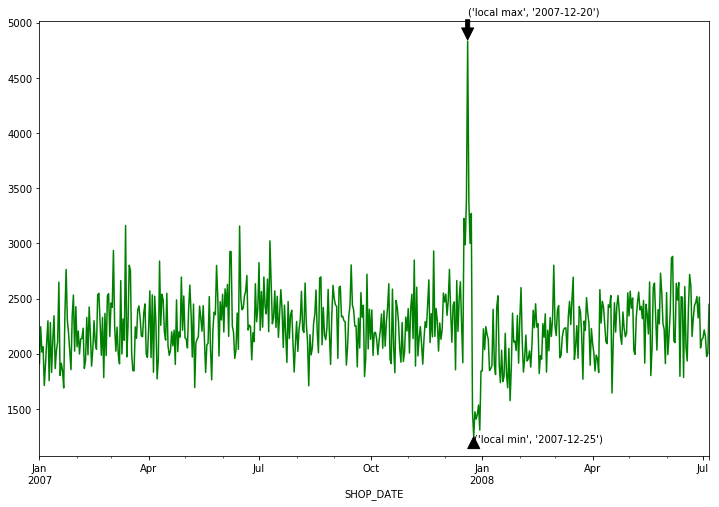

In [19]:
# Sale Trend
df_salehis = df.groupby(df['SHOP_DATE'])['SPEND'].sum()
ax = df_salehis.plot.line(figsize=(12,8), color='g')

ymax = max(df_salehis)
xidx = np.where(df_salehis == np.amax(df_salehis))
xmax = df_salehis[xidx[0]].index[0].date().__str__()

ax.annotate(('local max',xmax), xy=(xmax, ymax), xytext=(xmax, ymax*1.05),
            arrowprops=dict(facecolor='black', shrink=0.05),
            );

ymin = min(df_salehis)
xidx = np.where(df_salehis == np.amin(df_salehis))
xmin = df_salehis[xidx[0]].index[0].date().__str__()

ax.annotate(('local min',xmin), xy=(xmin, ymin), xytext=(xmin, ymin*0.95),
            arrowprops=dict(facecolor='black', shrink=0.05),
            verticalalignment='bottom'
            );

<font size="4" color='blue'><b>- There has a peak of sale at December 22, 2007 and Lowest point at December 26, 2007.<br> -
It could be the Christmas day that many people go out for shopping and stay at home after that</b></font>

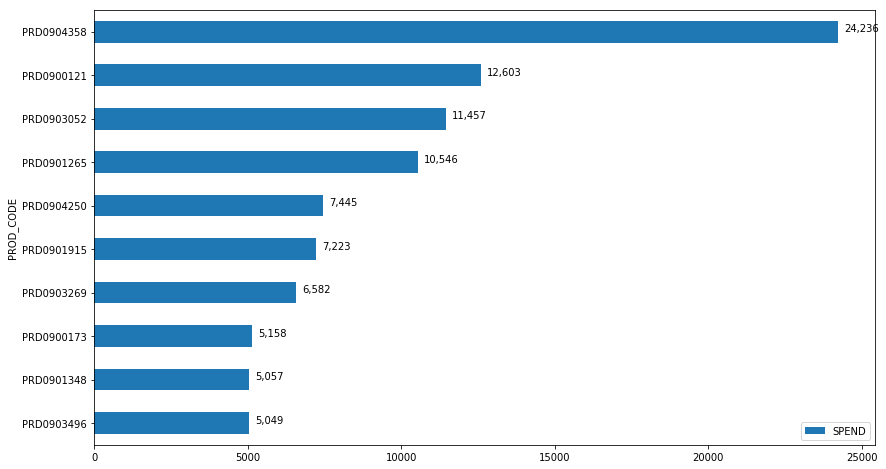

In [20]:
# Top Sales 10 Products
df_top10_sale = df.groupby('PROD_CODE')[['SPEND']].sum().sort_values(by='SPEND', ascending=True)[-10:]
ax = df_top10_sale.plot(kind='barh', figsize=(14,8))

for idx,val in enumerate(df_top10_sale.values.ravel()):
    ax.annotate(s='{:,}'.format(int(val)), xy=(val+200,idx))

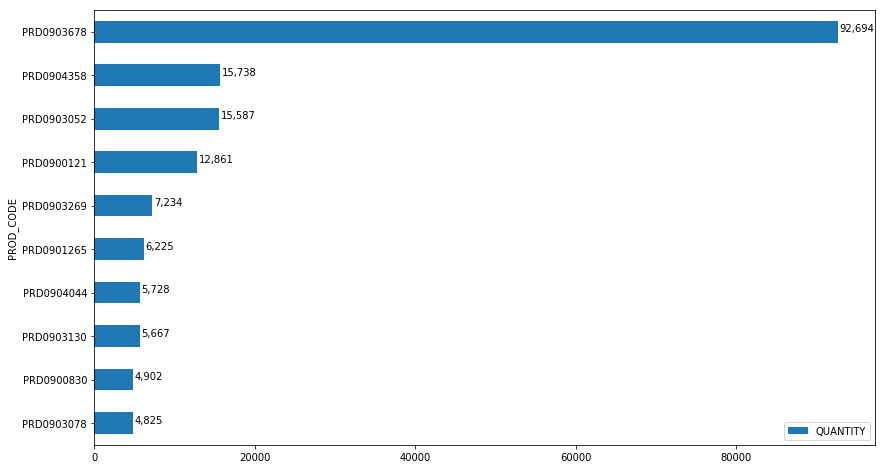

In [21]:
# Top Quantity 10 Products
df_top10_quan = df.groupby('PROD_CODE')[['QUANTITY']].sum().sort_values(by='QUANTITY', ascending=True)[-10:]
ax = df_top10_quan.plot(kind='barh', figsize=(14,8))

for idx,val in enumerate(df_top10_quan.values.ravel()):
    ax.annotate(s='{:,}'.format(int(val)), xy=(val+200,idx))

<a id="ch12"></a>
# Conclusion (Business in Action)
[Top](#ch0)

- During 8-12 and 17-21 of shop hour should set up promotion.
- Importing the product that similar to Prd0904358, Prd0903052, and Prd0900121 for increasing the sales
- The more % active LTM, the more chance of customer spending is rising. We should figure out the way to improve % active LTM, and it will increase the chance of increasing sales. 